In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from directories import Url
from src import get_url

url = get_url(Url.DATA.value)
df = pd.read_csv(url)

df.head()

,State,City/County/Borough/Region,Date,Total Death,Total Confirmed,Death Rate
0,Alabama,Choctaw,2022-08-20,37,2155,0.017169
1,Alabama,Perry,2022-08-20,47,2366,0.019865
2,Alabama,Wilcox,2022-08-19,48,3299,0.014550
3,Alabama,Greene,2022-08-19,51,2079,0.024531
4,Alabama,Sumter,2022-08-20,52,2882,0.018043


In [3]:
df['Total Death'].sum()

1025722

In [4]:
# how many Provinces/States are there?
df['State'].nunique()

52

In [5]:
# Create dataframe grouped by 'Province/State'
state_df = df.groupby('State').sum().reset_index()
state_df.head()

/var/folders/2b/3th3m2h118j350hwhvx48j580000gn/T/ipykernel_73555/1438802883.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_df = df.groupby('State').sum().reset_index()


,State,Total Death,Total Confirmed,Death Rate
0,Alabama,20041,1463933,1.102538
1,Alaska,1331,289052,0.111015
2,Arizona,30982,2237208,0.261312
3,Arkansas,11864,891979,1.242037
4,California,94486,10953003,0.469453


In [6]:
# Show the top 5 most deaths by Province/State
header = ['State', 'Total Death']
state_df = state_df.sort_values(by='Total Death', ascending=False)[header]
state_df.head()


,State,Total Death
4,California,94486
44,Texas,89964
9,Florida,78049
32,New York,70350
38,Pennsylvania,46514


In [7]:
# how many Provinces/States are not having deaths?
state_df[state_df['Total Death'] == 0]['State'].nunique()

0

In [8]:
# Create a bar plot to show the states with the most deaths
plt.figure(figsize=(10, 6))
plt.bar(state_df['State'], state_df['Total Death'])
plt.xlabel('State')
plt.ylabel('Total Death')
plt.title('Total Deaths by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# Calculate the percentage of deaths for each province/state
total_deaths = state_df['Total Death'].sum()
state_df['Percentage'] = (state_df['Total Death'] / total_deaths) * 100
state_df.head()

,State,Total Death,Percentage
4,California,94486,9.211658
44,Texas,89964,8.770798
9,Florida,78049,7.609177
32,New York,70350,6.858584
38,Pennsylvania,46514,4.534757


In [10]:
#  new Provinces/States with deaths is less than2% of the total deaths 
state_df[state_df['Percentage'] < 2]['State'].nunique()

35

In [11]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by 'Date' and calculate the sum of 'Total Death' for each date
daily_death = df.groupby('Date')['Total Death'].sum().reset_index()

# Create a line plot (time series plot)
plt.figure(figsize=(10, 6))
plt.plot(daily_death['Date'], daily_death['Total Death'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Death')
plt.title('Daily Total Deaths Over Time (Line Plot)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Find the city with the most deaths and the fewest deaths

non_zero_death = df[df['Total Death'] > 0]

most_deaths_city = non_zero_death[non_zero_death['Total Death'] == non_zero_death['Total Death'].max()][
    'City/County/Borough/Region'].values[0]
least_deaths_city = non_zero_death[non_zero_death['Total Death'] == non_zero_death['Total Death'].min()][
    'City/County/Borough/Region'].values[0]

print(f'Most Deaths: {most_deaths_city} Death Count: {non_zero_death["Total Death"].max()}')
print(f'Least Deaths: {least_deaths_city} Death Count: {non_zero_death["Total Death"].min()}')

Most Deaths: Los Angeles Death Count: 32991
Least Deaths: Skagway Death Count: 1


In [13]:
# create bar from the top 5 cities with the most deaths 
header = ['City/County/Borough/Region', 'Total Death', 'Total Confirmed']
city_df = non_zero_death.groupby('City/County/Borough/Region').sum().reset_index()
city_df = city_df.sort_values(by='Total Death', ascending=False)[header]
city_df['Ratio'] = city_df['Total Death'] / city_df['Total Confirmed']

# show 1 bar but have sub bar inside it between the total death and total confirmed
top_5_cities = city_df.head(5)

# Define the positions for the bars
x = np.arange(len(top_5_cities))

# Define the width of the bars
bar_width = 0.35

# Create the sub-bars for 'Total Death' and 'Total Confirmed'
plt.bar(x, top_5_cities['Total Death'], width=bar_width, label='Total Death')
plt.bar(x + bar_width, top_5_cities['Total Confirmed'], width=bar_width, label='Total Confirmed')

# Set the x-axis labels to be the city names
plt.xticks(x + bar_width / 2, top_5_cities['City/County/Borough/Region'], rotation=45)

# Set the labels and title
plt.xlabel('City/County/Borough/Region')
plt.ylabel('Counts')
plt.title('Top 5 Cities with Most Deaths and Total Confirmed Cases')

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/2b/3th3m2h118j350hwhvx48j580000gn/T/ipykernel_73555/2529066059.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_df = non_zero_death.groupby('City/County/Borough/Region').sum().reset_index()


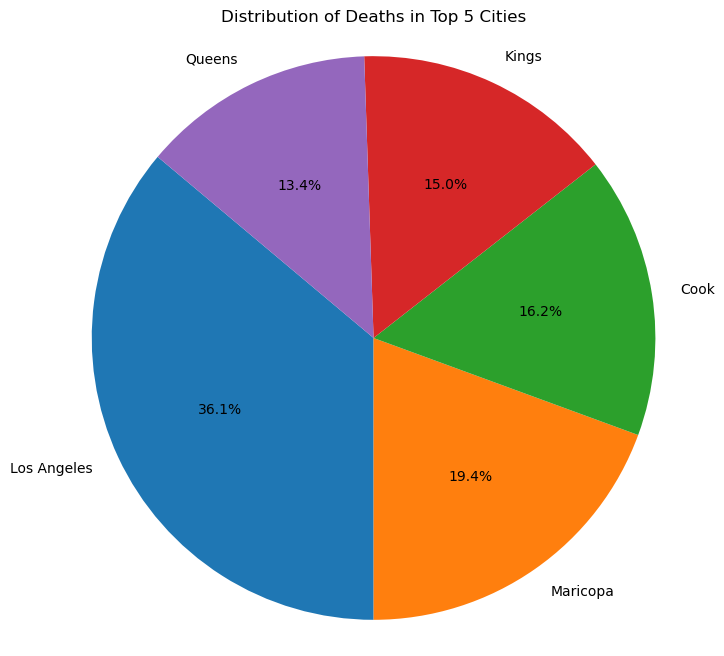

In [20]:
top_5_cities = city_df.head(5)

# Create a pie chart with percentage labels
plt.figure(figsize=(8, 8))
plt.pie(top_5_cities['Total Death'], labels=top_5_cities['City/County/Borough/Region'], autopct='%1.1f%%',
        startangle=140)

# Set the title
plt.title('Distribution of Deaths in Top 5 Cities')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()